In [7]:
#!pip show keras

Name: keras
Version: 2.14.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: C:\Users\YAS\anaconda3\envs\project-1\Lib\site-packages
Requires: 
Required-by: tensorflow-intel


In [123]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
#import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist

from tensorflow.keras.utils import to_categorical

#from keras.wrappers.scikit_learn import KerasClassifier

In [4]:
from tensorflow.keras.utils import to_categorical

In [ ]:
#!pip install keras==2.7.0

In [8]:
#from tensorflow.keras.wrappers.scikit_learn import 
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [2]:
#!pip install scikeras

In [ ]:
!pip show tensorflow==2.13.0rc2

In [ ]:
!pip show tensorflow

In [ ]:
!pip show keras

In [ ]:
!pip show numpy

In [124]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [125]:
X_train_digit.shape , y_train_digit.shape, X_test_digit.shape, y_test_digit.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [126]:
X_train_digit[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [127]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

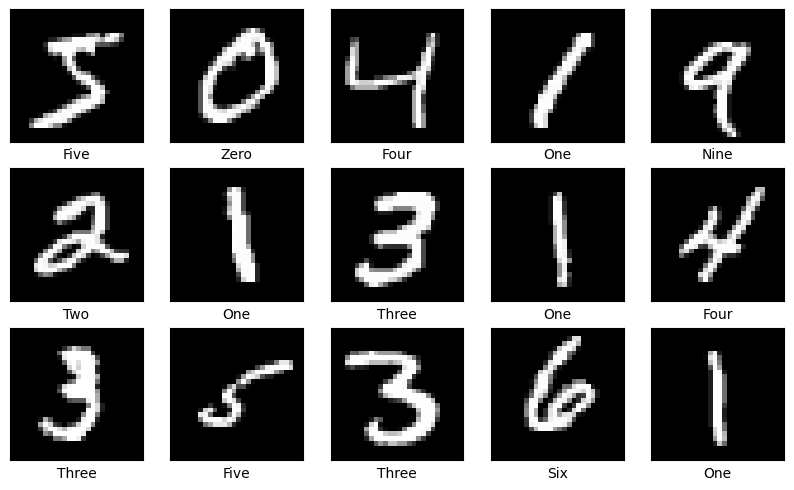

In [128]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

<span style ="color:red;font-size:20px;">__Preprocessing both input and output__ </span>
### Since ANN accepts only 2 D input hence before preprocessing knowing the shape of input variables & now it is in 3D 

In [9]:
X_train_digit.shape , X_test_digit.shape

((60000, 28, 28), (10000, 28, 28))

### Preprocessing the input-Converting 3d to 2d

In [18]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [20]:
X_train_digit.shape, X_test_digit.shape

((60000, 784), (10000, 784))

### ANN output should be in one hot ending 

In [22]:
y_train_digit.shape , y_test_digit.shape

((60000,), (10000,))

In [23]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [51]:
#y_test_digit.shape , y_test_digit.shape
y_test_digit , y_test_digit

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

<span style = "color:red; font-size:20px;font-size:larger;"> __Creating base Netural Networks__</span>     

In [25]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [26]:
#param_number = output_channel_number * (input_channel_number + 1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222218 (868.04 KB)
Trainable params: 222218 (868.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [29]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=15,validation_data=(X_test_digit, y_test_digit))

Epoch 1/15
600/600 [==============================] - 6s 10ms/step - loss: 0.0767 - accuracy: 0.9791 - val_loss: 0.1359 - val_accuracy: 0.9690
Epoch 2/15
600/600 [==============================] - 6s 10ms/step - loss: 0.0654 - accuracy: 0.9811 - val_loss: 0.1311 - val_accuracy: 0.9714
Epoch 3/15
600/600 [==============================] - 6s 10ms/step - loss: 0.0589 - accuracy: 0.9833 - val_loss: 0.1567 - val_accuracy: 0.9685
Epoch 4/15
600/600 [==============================] - 7s 11ms/step - loss: 0.0601 - accuracy: 0.9839 - val_loss: 0.1476 - val_accuracy: 0.9679
Epoch 5/15
600/600 [==============================] - 6s 11ms/step - loss: 0.0462 - accuracy: 0.9868 - val_loss: 0.1274 - val_accuracy: 0.9731
Epoch 6/15
600/600 [==============================] - 7s 12ms/step - loss: 0.0497 - accuracy: 0.9860 - val_loss: 0.1222 - val_accuracy: 0.9736
Epoch 7/15
600/600 [==============================] - 7s 11ms/step - loss: 0.0496 - accuracy: 0.9864 - val_loss: 0.1218 - val_accuracy: 0.9736

In [42]:
test_loss_digit, test_acc_digit = model.evaluate(X_test_digit,y_test_digit)

313/313 [==============================] - 1s 3ms/step - loss: 0.1292 - accuracy: 0.9771


In [44]:
r = round(test_acc_digit,2)
r

0.98

In [46]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)
y_predict[0]

313/313 [==============================] - 1s 3ms/step


array([7.8076464e-01, 9.3574303e-01, 9.9999452e-01, 9.9995488e-01,
       4.0611380e-01, 1.3556850e-01, 1.9118863e-15, 1.0000000e+00,
       6.5958428e-01, 9.9999940e-01], dtype=float32)

In [47]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector

In [50]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [53]:
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [54]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

<span style="color: red; font-size: 20px;">__Creating confusion matrix to know the accuracy__ </span>

In [25]:
#!pip install seaborn

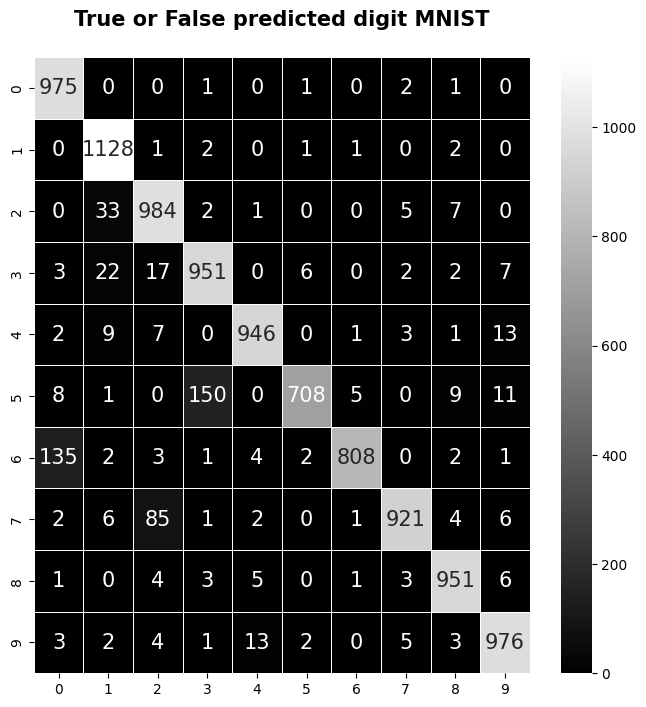

In [55]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
#plt.style.use('seaborn-deep')
plt.figure(figsize=(8,8))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       980
           1       0.94      0.99      0.96      1135
           2       0.89      0.95      0.92      1032
           3       0.86      0.94      0.90      1010
           4       0.97      0.96      0.97       982
           5       0.98      0.79      0.88       892
           6       0.99      0.84      0.91       958
           7       0.98      0.90      0.94      1028
           8       0.97      0.98      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000



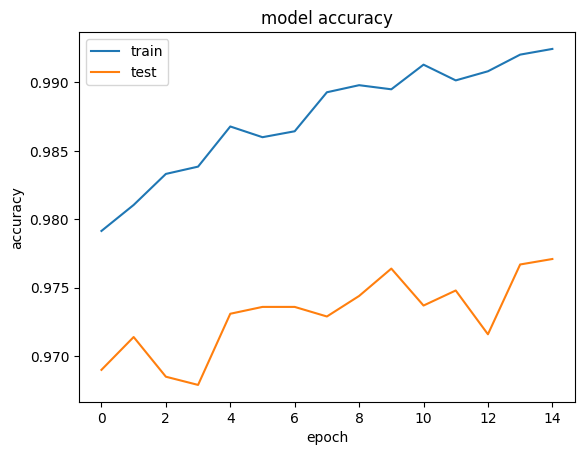

In [57]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

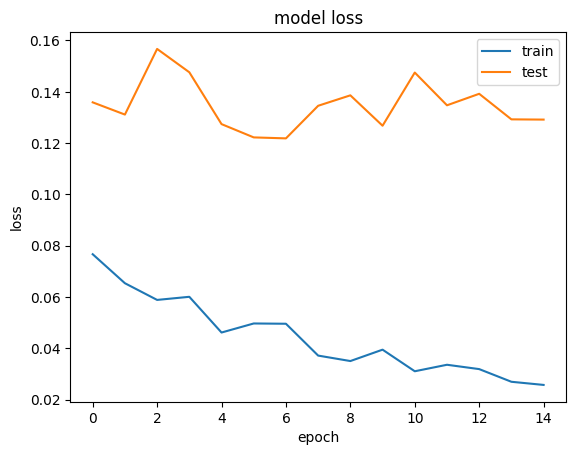

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [94]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit)
y_predict_single[1]

313/313 [==============================] - 0s 1ms/step


array([1.4860971e-05, 9.5966709e-01, 1.0000000e+00, 9.9978417e-01,
       1.9149754e-06, 1.2333052e-03, 3.2071733e-07, 9.9999553e-01,
       8.0402657e-05, 3.7624059e-10], dtype=float32)

In [95]:
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_predicts_single[1]

2

In [85]:
y_test_digit_eval=np.argmax(y_test_digit, axis=1)
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

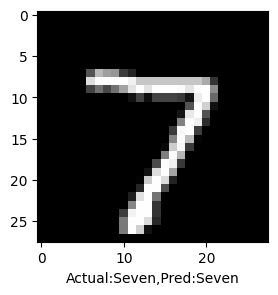

In [121]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(3,3))
plt.imshow(X_test_digit[0].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[(y_test_digit_eval[0])],col_names[(y_predicts_single[0])]))
plt.show()